
## Logistic Regression on Bank Loan Data
In this notebook, we perform logistic regression to predict whether a customer will accept a personal loan based on various features such as income, education, family size, and more. We will follow these steps:
1. Import necessary libraries.
2. Load and inspect the dataset.
3. Preprocess the data.
4. Train a logistic regression model.
5. Evaluate the model's performance using confusion matrix, classification report, and ROC curve.



### Step 1: Importing Libraries
We import the necessary libraries including `LogisticRegression` for building the model, `train_test_split` for splitting the data into training and testing sets, and several metrics for evaluating the model's performance such as `confusion_matrix`, `classification_report`, `roc_curve`, and `auc`.


In [1]:

# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd



### Step 2: Loading and Inspecting the Dataset
We load the dataset and display the first few rows to understand the structure of the data. The dataset contains features such as age, income, family size, education, and whether the customer accepted a personal loan (`Personal.Loan`).


In [2]:

# Step 2: Load and inspect the dataset
# Assuming the dataset file is uploaded in the environment
df = pd.read_csv('/content/bankloan.csv')
# Display the first few rows of the dataset
df.head()


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1



### Step 3: Preprocessing the Data
We drop columns that are not useful for the prediction, such as 'ID' and 'ZIP.Code'. We define the features (X) as all columns except `Personal.Loan`, which becomes our target variable (y). The dataset is then split into training and testing sets, with 60% of the data reserved for testing.


In [3]:

# Step 3: Preprocessing the data
# Drop unnecessary columns such as 'ID' and 'ZIP.Code'
df = df.drop(columns=['ID', 'ZIP.Code'])
# Define features (X) and target variable (y)
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)



### Step 4: Training the Logistic Regression Model
We create and train a logistic regression model using the training set. The coefficients of the features and the intercept of the model are displayed.


In [4]:

# Step 4: Train the logistic regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
# Display the model's coefficients and intercept
log_reg.coef_, log_reg.intercept_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[-4.30373613e-01,  4.16683029e-01,  4.91921869e-02,
          5.45227326e-01,  1.26844566e-01,  1.82877336e+00,
          1.64517492e-03, -9.34287531e-01,  3.21824015e+00,
         -4.33984254e-01, -8.49791727e-01]]),
 array([-1.65468908]))


### Step 5: Evaluating the Model
We use the test set to make predictions and evaluate the model's performance using a confusion matrix and a classification report, which provides precision, recall, and f1-score.


In [5]:

# Step 5: Evaluate the model
# Make predictions on the test set
y_pred = log_reg.predict(X_test)
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix, class_report


(array([[2684,   34],
        [ 113,  169]]),
 '              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97      2718\n           1       0.83      0.60      0.70       282\n\n    accuracy                           0.95      3000\n   macro avg       0.90      0.79      0.84      3000\nweighted avg       0.95      0.95      0.95      3000\n')


### Step 6: Plotting ROC and AUC Curve
We plot the ROC (Receiver Operating Characteristic) curve to visualize the model's performance at different thresholds. The AUC (Area Under the Curve) is also calculated to summarize the model's performance.


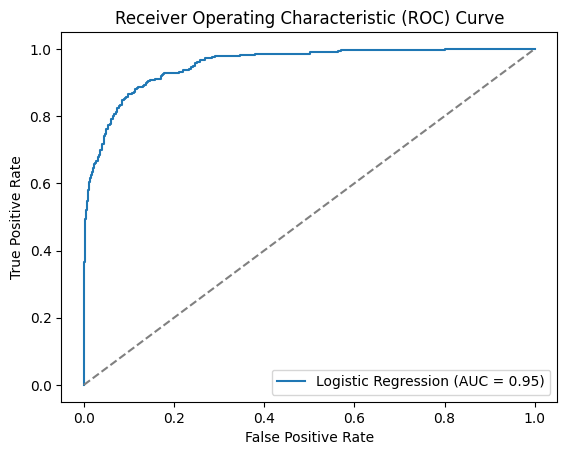

In [6]:

# Step 6: Plotting ROC and AUC curve
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
